In [17]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [4]:
# Load the data
data = pd.read_csv('data.csv')



# Exploratory Data Analysis

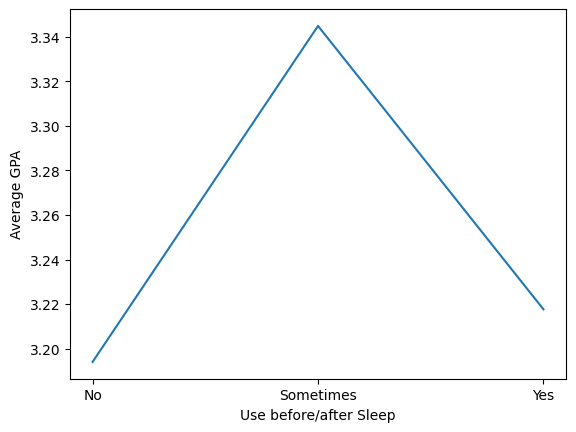

In [5]:
# analysis of use before and after sleep vs gpa
 
one = data[data['use before/after sleep'] == 1]
two = data[data['use before/after sleep'] == 2]
three = data[data['use before/after sleep'] == 3]



one_mean = one['converted gpa'].mean()
two_mean = two['converted gpa'].mean()
three_mean = three['converted gpa'].mean()



X = ["No","Sometimes","Yes"]
Y = [one_mean, two_mean, three_mean]

plt.plot(X,Y)

plt.xlabel("Use before/after Sleep")
plt.ylabel("Average GPA")

plt.show()


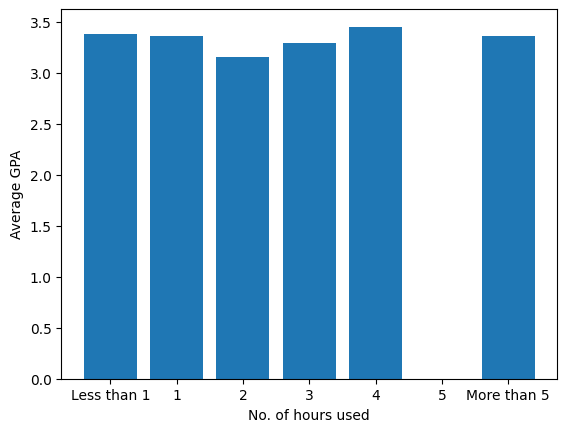

In [6]:
# analysis of no. of hours used vs gpa
 
zero = data[data['hours used'] == 0]
one = data[data['hours used'] == 1]
two = data[data['hours used'] == 2]
three = data[data['hours used'] == 3]
four = data[data['hours used'] == 4]
five = data[data['hours used'] == 5]
six = data[data['hours used'] == 6]



zero_mean = zero['converted gpa'].mean()
one_mean = one['converted gpa'].mean()
two_mean = two['converted gpa'].mean()
three_mean = three['converted gpa'].mean()
four_mean = four['converted gpa'].mean()
five_mean = five['converted gpa'].mean()
six_mean = six['converted gpa'].mean()



X = ["Less than 1", "1","2","3","4","5", "More than 5"]
Y = [zero_mean, one_mean, two_mean, three_mean, four_mean, five_mean, six_mean]

plt.bar(X,Y)

plt.xlabel("No. of hours used")
plt.ylabel("Average GPA")

plt.show()


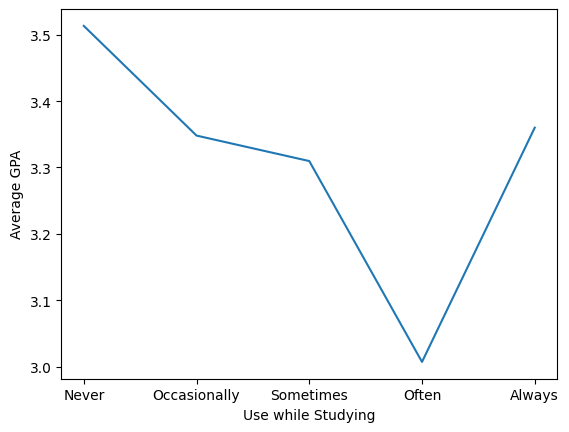

In [7]:
# analysis of use during study/lectures and gpa

one = data[data['use during lectures'] == 1]
two = data[data['use during lectures'] == 2]
three = data[data['use during lectures'] == 3]
four = data[data['use during lectures'] == 4]
five = data[data['use during lectures'] == 5]

one_mean = one['converted gpa'].mean()
two_mean = two['converted gpa'].mean()
three_mean = three['converted gpa'].mean()
four_mean = four['converted gpa'].mean()
five_mean = five['converted gpa'].mean()


X = ["Never","Occasionally","Sometimes","Often","Always"]
Y = [one_mean, two_mean, three_mean, four_mean, five_mean]

plt.plot(X,Y)

plt.xlabel("Use while Studying")
plt.ylabel("Average GPA")

plt.show()


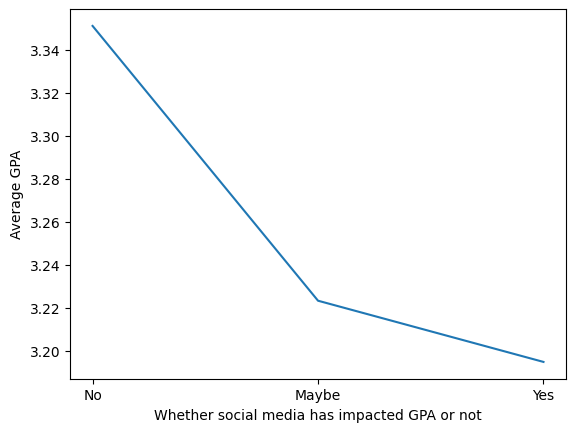

In [8]:
# analysis of impact vs avg gpa

one = data[data['impact score'] == 1]
two = data[data['impact score'] == 2]
three = data[data['impact score'] == 3]

one_mean = one['converted gpa'].mean()
two_mean = two['converted gpa'].mean()
three_mean = three['converted gpa'].mean()


X = ["No","Maybe","Yes"]
Y = [one_mean, two_mean, three_mean]

plt.plot(X,Y)

plt.xlabel("Whether social media has impacted GPA or not")
plt.ylabel("Average GPA")

plt.show()

# Correlation between Features

In [11]:
# select columns for social media use and GPA
social_media = data['sum']
gpa = data['converted gpa']

# calculate correlation coefficient
corr_coef, p_val = pearsonr(social_media, gpa)

# print the correlation matrix
print("Pearson correlation coefficient: {:.2f}".format(corr_coef))
print("p-value: {:.4f}".format(p_val))



Pearson correlation coefficient: -0.24
p-value: 0.0434


In [12]:
data['Gender'] = data['Gender'].replace({'Female': 1, 'Male': 0})

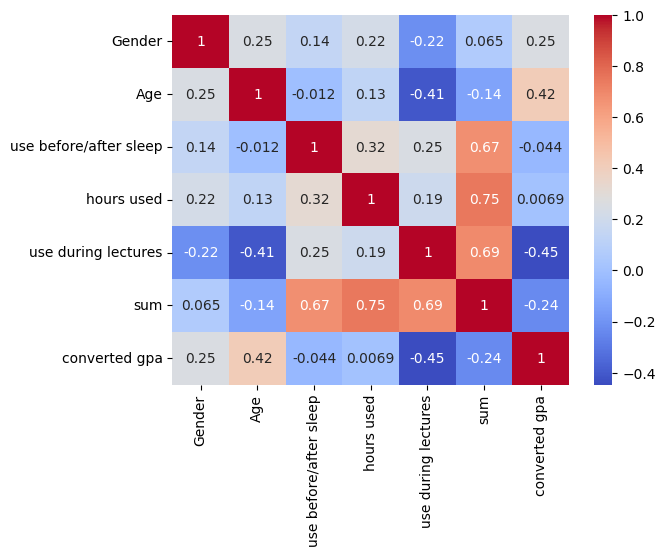

In [13]:
# Select the columns you want to include in the correlation matrix
columns = ['Gender', 'Age', 'use before/after sleep','hours used', 'use during lectures', 'sum', 'converted gpa']

# Calculate the correlation matrix
corr_matrix = data[columns].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# T-Tests

In [38]:
data = pd.read_csv('data.csv')


In [29]:
data = data.sample(n=30)

In [39]:
data.loc[data['use during lectures'] < 3, 'use'] = 'Low'
data.loc[data['use during lectures'] >= 3, 'use'] = 'High'

high_social_media = data[data['use'] == "High"]
low_social_media = data[data['use'] == "Low"]

# print(high_social_media)
# print(low_social_media)

In [40]:
stats.levene(high_social_media['converted gpa'], low_social_media['converted gpa'])


LeveneResult(statistic=0.027519478215721937, pvalue=0.8687084932926717)

In [41]:
if stats.levene(high_social_media['converted gpa'], low_social_media['converted gpa'])[1] < 0.05:
    t, p = stats.ttest_ind(high_social_media['converted gpa'], low_social_media['converted gpa'], equal_var=False)
else:
    t, p = stats.ttest_ind(high_social_media['converted gpa'], low_social_media['converted gpa'])


In [42]:
print(t)
print(p)

-3.0506656885228365
0.0031953771895249484


# Confidence Intervals

In [43]:
data = pd.read_csv('data.csv')


In [44]:
data.loc[data['use during lectures'] < 3, 'use'] = 0
data.loc[data['use during lectures'] >= 3, 'use'] = 1

high_social_media = data[data['use'] == 1]
low_social_media = data[data['use'] == 0]



gpa_high_sm = high_social_media['converted gpa']
gpa_low_sm = low_social_media['converted gpa']

high_sm = high_social_media['use']
low_sm = low_social_media['use']

In [45]:
mean_high_sm = np.mean(gpa_high_sm)
mean_low_sm = np.mean(gpa_low_sm)

std_high_sm = np.std(gpa_high_sm, ddof=1)
std_low_sm = np.std(gpa_low_sm, ddof=1)



In [46]:
print(mean_high_sm)
print(mean_low_sm)

print(std_high_sm)
print(std_low_sm)

3.152333333333334
3.3635624999999996
0.30146307193392263
0.2864247846434811


In [47]:
se = np.sqrt((std_low_sm**2 / len(gpa_low_sm)) + (std_high_sm**2 / len(gpa_high_sm)))
print(se)

0.06875705637225397


In [48]:
t = stats.t.ppf(0.95, len(gpa_low_sm) + len(gpa_high_sm) - 2)
df = len(gpa_low_sm) + len(gpa_high_sm) - 2

# Calculate the confidence interval
lower_bound = (mean_high_sm - mean_low_sm) - (t * se)
upper_bound = (mean_high_sm - mean_low_sm) + (t * se)

In [49]:
if upper_bound > 0:
    print("The upper bound of the confidence interval is", upper_bound, "which is greater than 0. Therefore, we fail to reject the null hypothesis.")
else:
    print("The upper bound of the confidence interval is", upper_bound, "which is less than or equal to 0. Therefore, we reject the null hypothesis and accept the alternative hypothesis.")

The upper bound of the confidence interval is -0.09665971707601359 which is less than or equal to 0. Therefore, we reject the null hypothesis and accept the alternative hypothesis.


In [50]:
print(lower_bound)
print(upper_bound)

-0.32579861625731776
-0.09665971707601359
